In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import minimum_filter1d, uniform_filter1d

from environments.ocelot import ARESEAOcelot

initializing ocelot...


In [2]:
env = ARESEAOcelot()
observation = env.reset()

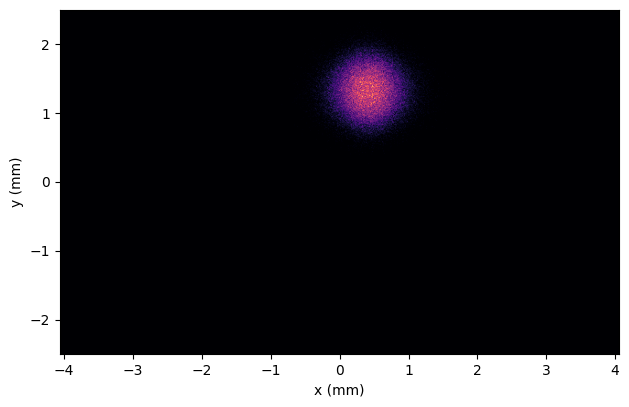

In [25]:
x_max = env.screen_resolution[0] * env.pixel_size[0] / 2 * 1e3
y_max = env.screen_resolution[1] * env.pixel_size[1] / 2 * 1e3
extent = (-x_max, x_max, -y_max, y_max)

plt.imshow(env.screen_data, cmap="magma", interpolation=None, extent=(-x_max,x_max,-y_max,y_max))
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.tight_layout()
plt.savefig("figures/image.pdf")
plt.savefig("figures/image.png", dpi=300)
plt.show()

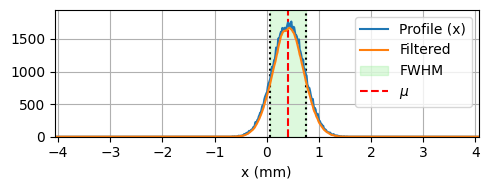

In [32]:
axis = 0
n = int(env.screen_resolution[axis] / env.binning)
x = np.linspace(-x_max, x_max, n)
profile = env.screen_data.sum(axis=axis)
minfiltered = minimum_filter1d(profile, size=5, mode="nearest")
filtered = uniform_filter1d(minfiltered, size=5, mode="nearest")
half_values, = np.where(filtered >= 0.5 * filtered.max())
fwhm_pixel = half_values[-1] - half_values[0]
center_pixel = half_values[0] + fwhm_pixel / 2
mu = (center_pixel - len(filtered) / 2) * env.pixel_size[axis] * env.binning * 1e3
fwhm = fwhm_pixel * env.pixel_size[axis] * env.binning * 1e3
sigma = fwhm / 2.355

plt.figure(figsize=(5,2))
plt.axvspan(mu-fwhm/2, mu+fwhm/2, color="lightgreen", alpha=0.3, label="FWHM")
plt.plot(x, profile, label="Profile (x)")
plt.plot(x, filtered, label="Filtered")
plt.vlines([mu-fwhm/2,mu+fwhm/2], 0, profile.max()*1.1, color="black", ls="dotted")
plt.vlines(mu, 0, profile.max()*1.1, color="red", ls="--", label=r"$\mu$")
plt.xlabel("x (mm)")
plt.xlim(x.min(), x.max())
plt.ylim(0, profile.max()*1.1)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("figures/xprofile.pdf")
plt.savefig("figures/xprofile.png", dpi=300)
plt.show()

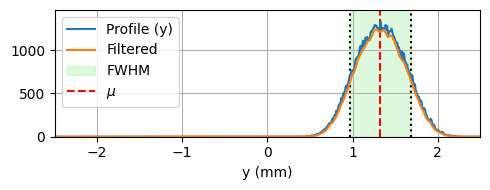

In [33]:
axis = 1
n = int(env.screen_resolution[axis] / env.binning)
y = np.linspace(-y_max, y_max, n)
profile = env.screen_data.sum(axis=axis)
profile = np.flip(profile)
minfiltered = minimum_filter1d(profile, size=5, mode="nearest")
filtered = uniform_filter1d(minfiltered, size=5, mode="nearest")
half_values, = np.where(filtered >= 0.5 * filtered.max())
fwhm_pixel = half_values[-1] - half_values[0]
center_pixel = half_values[0] + fwhm_pixel / 2
mu = (center_pixel - len(filtered) / 2) * env.pixel_size[axis] * env.binning * 1e3
fwhm = fwhm_pixel * env.pixel_size[axis] * env.binning * 1e3
sigma = fwhm / 2.355

plt.figure(figsize=(5,2))
plt.axvspan(mu-fwhm/2, mu+fwhm/2, color="lightgreen", alpha=0.3, label="FWHM")
plt.plot(y, profile, label="Profile (y)")
plt.plot(y, filtered, label="Filtered")
plt.vlines([mu-fwhm/2,mu+fwhm/2], 0, profile.max()*1.1, color="black", ls="dotted")
plt.vlines(mu, 0, profile.max()*1.1, color="red", ls="--", label=r"$\mu$")
plt.xlabel("y (mm)")
plt.xlim(y.min(), y.max())
plt.ylim(0, profile.max()*1.1)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("figures/yprofile.pdf")
plt.savefig("figures/yprofile.png", dpi=300)
plt.show()